[link text](https://en.innovatiana.com/post/best-datasets-for-text-classification)....used this link to find the IMDB dataset

In [4]:
import pandas as pd

# Load the IMDB dataset
dataset_path = 'IMDB_Dataset.csv'  # Update this path if the file is in a different location
dataset = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(dataset.info())
print(dataset.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only required once)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Pre-processing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # To Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # To Remove punctuation
    text = re.sub(r'\d+', '', text)  #To  Remove numbers
    tokens = word_tokenize(text)  # To Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # To Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Applying  preprocessing to the reviews
dataset['cleaned_review'] = dataset['review'].apply(preprocess_text)
print(dataset[['review', 'cleaned_review']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


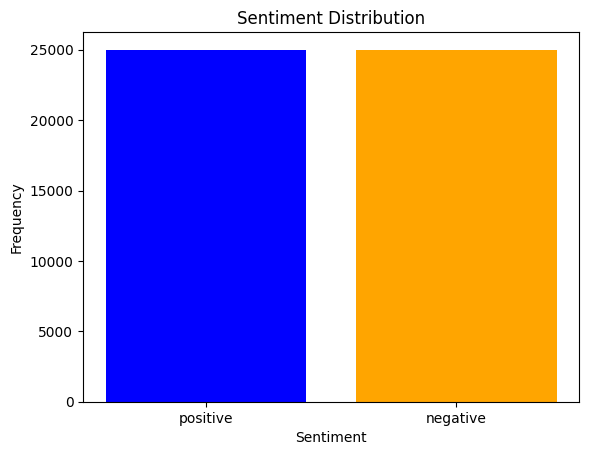

In [7]:
##to visualize class distribution ..##Visualize how many reviews are labeled as positive or negative
import matplotlib.pyplot as plt

# Plot sentiment distribution
class_distribution = dataset['sentiment'].value_counts()
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [10]:
##vectorization of text data...toConvert cleaned text into numerical features using TF-IDF.

###Encoding sentiment labels as binary values: positive → 1, negative → 0.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Using TF-IDF vectorization for feature extraction
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words for efficiency
X = vectorizer.fit_transform(dataset['cleaned_review'])
y = dataset['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Encode labels as binary (1/0)

print(f"Shape of feature matrix: {X.shape}")


Shape of feature matrix: (50000, 5000)


In [11]:
##train and test splitting
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 40000, Testing samples: 10000


Baseline Model (Naive Bayes)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes classifier
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

# Evaluate the model on test data
y_pred_nb = model_nb.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8488
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression Model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")

# Support Vector Machine Model (Linear Kernel)
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")


Logistic Regression Accuracy: 0.8846
SVM Accuracy: 0.8863


##DEEP LEARNING MODEL

In [18]:
# prompt: USE A DEEP LEARNING MODEL FOR THE ABOVE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the deep learning model
model_dl = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model_dl.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

# Train the model
model_dl.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1) # Reduced epochs for faster execution

# Evaluate the model
loss, accuracy = model_dl.evaluate(X_test, y_test)
print(f"Deep Learning Model Accuracy: {accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7881 - loss: 0.4238 - val_accuracy: 0.8827 - val_loss: 0.2777
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9154 - loss: 0.2206 - val_accuracy: 0.8802 - val_loss: 0.2858
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9356 - loss: 0.1732 - val_accuracy: 0.8785 - val_loss: 0.3104
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9603 - loss: 0.1198 - val_accuracy: 0.8805 - val_loss: 0.3406
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9739 - loss: 0.0828 - val_accuracy: 0.8740 - val_loss: 0.3984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 0.3751
Deep Learning Model Accuracy: 0.8784000277519226


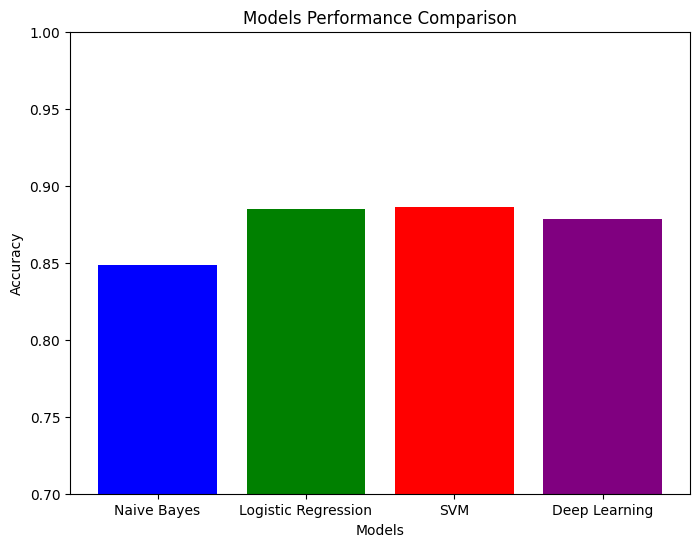

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0

In [20]:


# Assuming you want to compare the performance of the models
# Create a dictionary to store the results
model_results = {
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Deep Learning": accuracy
}


# Create a bar chart to visualize the performance
plt.figure(figsize=(8, 6))
plt.bar(model_results.keys(), model_results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Performance Comparison")
plt.ylim(0.7, 1.0) # Set y-axis limits
plt.show()

# Print classification reports for all models (optional but provides detailed insight)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
